# Hello! 
### Thanks for dropping by my folder. In this project, I will be performing Exploratory Data Analysis and Hypothesis testing based on the student performance dataset hosted on UC Irvine's ML Repo. I'm doing the project locally, but I'll input the relevant csv's on the directory, if you want to run the code blocks.


### Data Description:
 Includes data on student grades, demographic, social, and school-related features from two Portuguese schools.

 There are 2 csv's: one for Math class and one for Portugese.

In [34]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
#loading the csv's in
math_df = pd.read_csv('./student-mat.csv', sep= ';')
portugese_df = pd.read_csv('./student-por.csv', sep = ';')

In [37]:
math_df.head()
# math_df.info()
# math_df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [12]:
# portugese_df.head()
# portugese_df.info()
portugese_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


### It looks like we have clean datasets for both Portugese and math classes. The average final grade for portugese was around 11.9 with a standard deviation of 3.23. The average final grade for math was around 10.4 with a standard deviation of 4.58.

Now let's move on to the EDA. I will start with a correlation matrix to see if there are any strong relationships between the numeric features and the target variables. Correlation matrix documentation is here:https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [27]:
math_num_df = math_df.select_dtypes(include= 'number')
port_num_df = portugese_df.select_dtypes(include= 'number')


In [30]:
math_corr_df = math_num_df.corr()
port_corr_df = port_num_df.corr()

<Axes: >

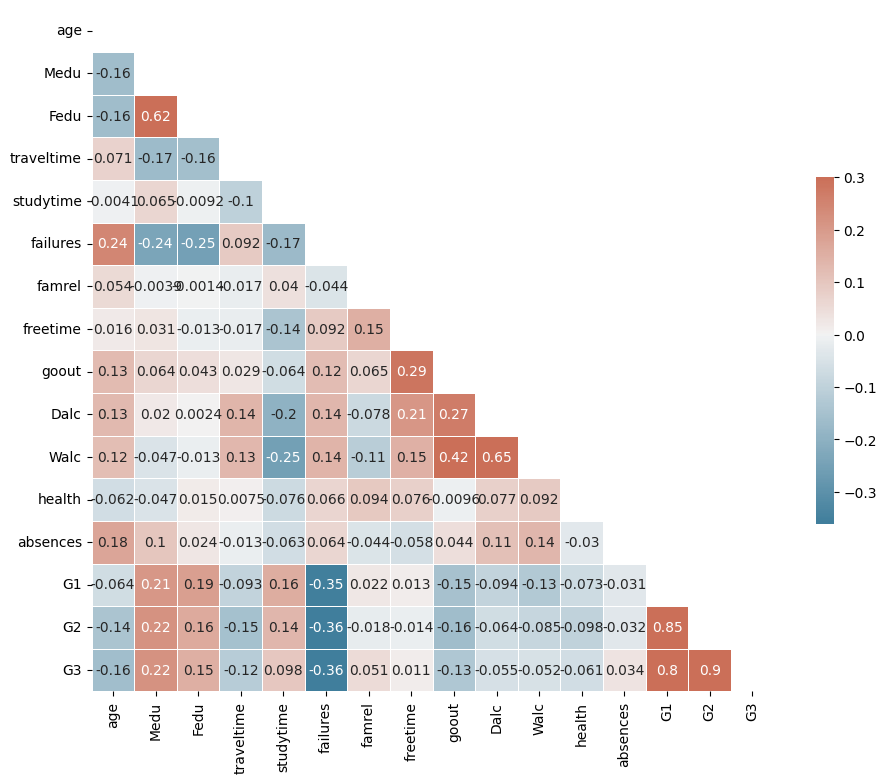

In [36]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(math_corr_df, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(math_corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True)

We can see the different relationships between each other. The most interesting relationships to pay attention to are the ones with the final grades (G3). 

We can see that the highest positive correlations are with Mother's education and Father's education. G1 and G2 are bound to have high correlations, because G3 is the final grade, so it is expected that the previous grades would have a high correlation with the final grade.

The greatest negative correlations are with failures, age and goout. This is interesting because it shows that the more failures a student has, the lower their final grade is. The older the student is, the lower their final grade is. The more they go out, the lower their final grade is.

### Now we will perform EDA on some of the categorical values and see how they affect the final grades. 
There are many graphs that can be used, but I like to use box plots when evaluating categorical values on a numeric target variable. Box plots are great for visualizing the distribution of the data and identifying 

<Axes: xlabel='address', ylabel='G3'>

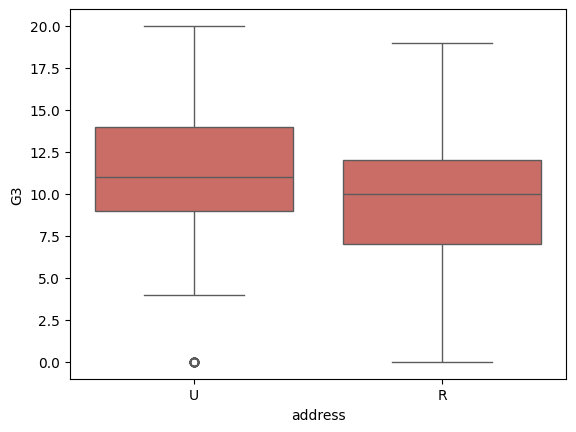

In [62]:
# # def get_dist(dataframe, x, y):
# #     sns.boxplot(data = math_df, x = )
sns.set_palette("hls")
sns.boxplot(data = math_df, x = 'address', y= 'G3')


<Axes: xlabel='address', ylabel='G3'>

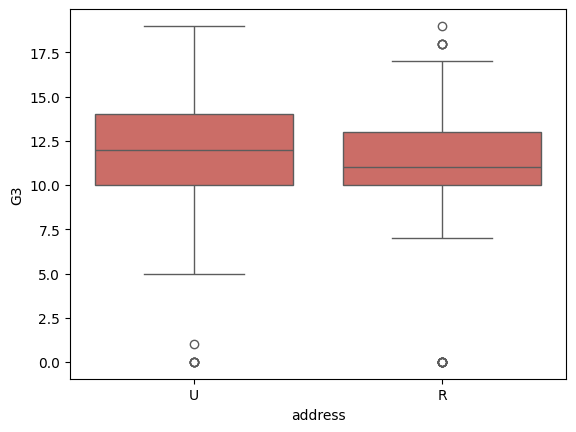

In [61]:
sns.set_palette("hls")
sns.boxplot(data = portugese_df, x = 'address', y= 'G3')

On average, students from Urban areas had a higher median final grade than rural students for both Math and Portugese.

<Axes: xlabel='paid', ylabel='G3'>

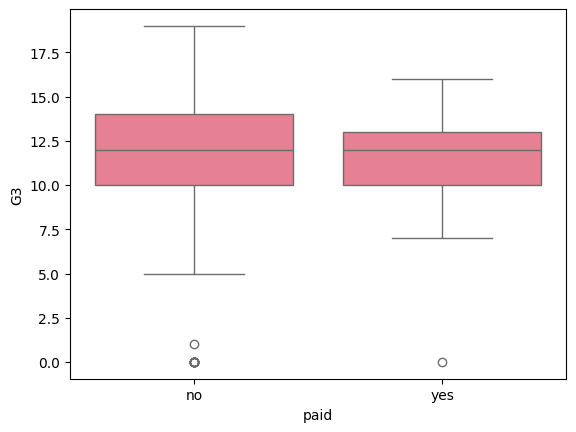

In [54]:
sns.set_palette("husl")
sns.boxplot(data = portugese_df, x = 'paid', y= 'G3')

<Axes: xlabel='paid', ylabel='G3'>

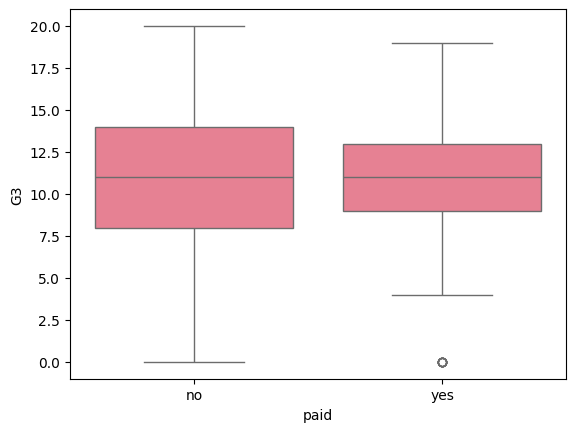

In [55]:
sns.boxplot(data = math_df, x = 'paid', y= 'G3')

Strangely enough, it seems that there really wasn't too big of a difference between the final grades of students who paid for extra classes in Math and Portugese and those who didn't. 

<Axes: xlabel='internet', ylabel='G3'>

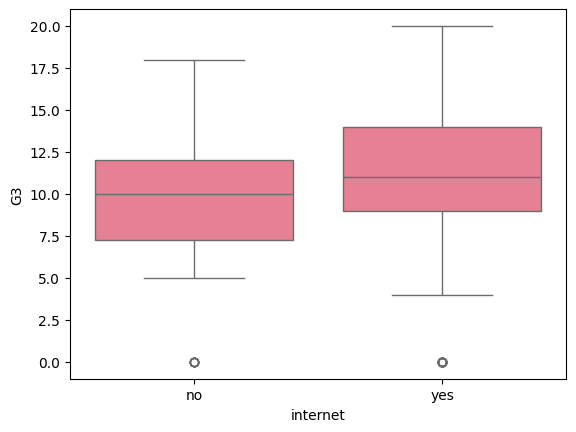

In [56]:
sns.boxplot(data = math_df, x = 'internet', y= 'G3')

<Axes: xlabel='internet', ylabel='G3'>

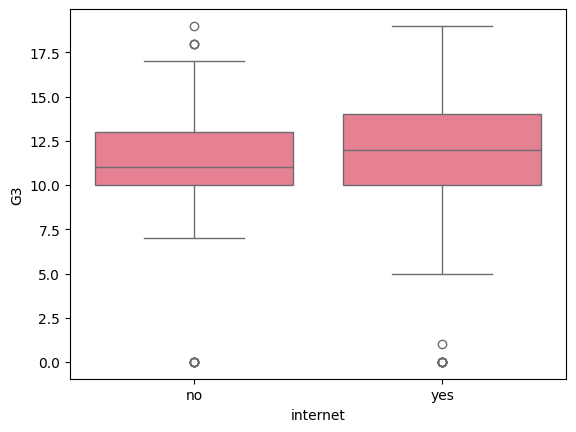

In [57]:
sns.boxplot(data = portugese_df, x = 'internet', y= 'G3')

Students who had access to internet at home had a higher median final grade than those who didn't for both Math and Portugese.

## Hypothesis Formulation: Now we will formulate some hypotheses based on the EDA we have done so far. For simplicity's sake, we will only be focusing on Math scores.

### Hypothesis 1: Internet access at home is a significant factor in improving a student's final grade in Math

### Hypothesis 2: A student's location (Urban or Rural) is a significant factor in determining a student's final grade in Math

Hypothesis 1:

Null hypothesis: There is no relation between final grade and internet access at home


Alternate Hypothesis: There is a significant relation between final grade and internet access at home


## Let's split up the data into two groups, so we can conduct t-tests.

In [65]:
#here we split the dataframe into two different dataframes based on whether or not they have internet.
math_no_internet = math_df[math_df['internet'] == 'no'] 
math_yes_internet = math_df[math_df['internet'] == 'yes'] 


## Now we need to create histograms of each split's G3 score distributions to make sure the data follows an approximately normal distribution. If it does, then we can proceed with t-tests

<Axes: xlabel='G3', ylabel='Count'>

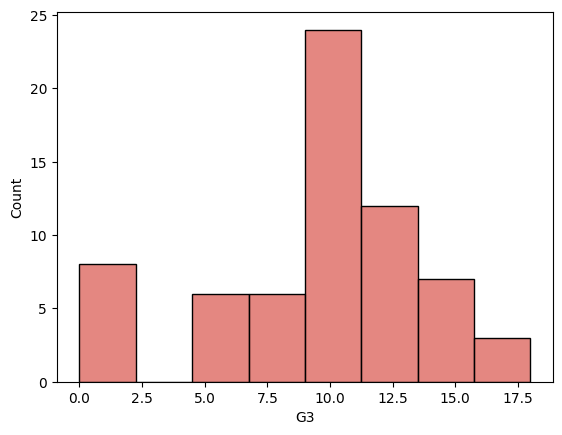

In [66]:
sns.histplot(math_no_internet['G3'])

<Axes: xlabel='G3', ylabel='Count'>

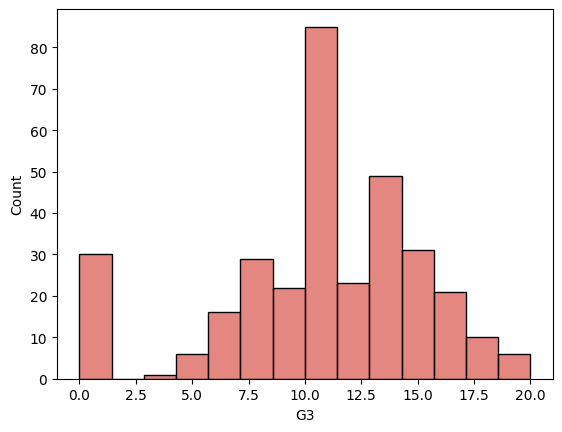

In [67]:
sns.histplot(math_yes_internet['G3'])

## This is great. Both of these distributions are approximately normal, so we can proceed with the t-tests by calculating the test statistic

In [74]:
#getting the score averages
mean_no_internet = math_no_internet['G3'].mean()
mean_internet = math_yes_internet['G3'].mean()

# getting the score variances
variance_no_internet = math_no_internet['G3'].var()
variance_internet = math_yes_internet['G3'].var()

In [78]:
#now we calculate standard error
n1 = math_yes_internet['G3'].count()
n2 = math_no_internet['G3'].count()

mean_dif = mean_internet - mean_no_internet
standard_error = np.sqrt((variance_no_internet / n1) + (variance_internet / n2))

degree_of_freedom = (n1+ n2)-2

test_stat = mean_dif/standard_error

print("Mean (No Internet):", mean_no_internet)
print("Mean (With Internet):", mean_internet)
print("Mean Difference:", mean_dif)
print("Variance (No Internet):", variance_no_internet)
print("Variance (With Internet):", variance_internet)
print("Sample Size (No Internet):", n1)
print("Sample Size (With Internet):", n2)
print("Standard Error:", standard_error)
print("T-test Statistic:", test_stat)
print("Degrees of Freedom:", degree_of_freedom)



Mean (No Internet): 9.409090909090908
Mean (With Internet): 10.617021276595745
Mean Difference: 1.2079303675048365
Variance (No Internet): 20.12237762237762
Variance (With Internet): 20.98092890503373
Sample Size (No Internet): 329
Sample Size (With Internet): 66
Standard Error: 0.6156745115812304
T-test Statistic: 1.9619626032634054
Degrees of Freedom: 393


## Now we have everything we need to complete our t-test. We will use an alpha value (significance) of .05

In [81]:
from scipy.stats import t

# Define your alpha level and degrees of freedom
alpha = 0.05 


critical_t_value = t.ppf(1 - alpha, degree_of_freedom)

# Output the critical t-value
print("Critical t-value:", critical_t_value)
print("Test stat: ", test_stat)

Critical t-value: 1.6487401136368147
Test stat:  1.9619626032634054


## Since our test statistic is higher than our critical t-value, we can reject the null hypothesis and claim that there is a significant relation between final grade and internet access at home.

# We can do the same for the second hypothesis, but as we've seen wit the box plots, there is a substantial difference between the scores of urban and rural students. We can reject the null hypothesis and claim that there is a significant relation between final grade and location.